In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv('../input/tmdb-box-office-prediction/train.csv')
test_data = pd.read_csv('../input/tmdb-box-office-prediction/test.csv')

In [3]:
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
training_data = train_data.drop(['id', 'belongs_to_collection', 'homepage', 'imdb_id',
                                 'original_title', 'overview', 'poster_path', 'release_date', 'tagline', 'title',
                              'Keywords', 'cast', 'crew'
                             ], axis = 1)

In [5]:
training_data.head()

,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,3923970


In [6]:
training_data.isnull().sum()

budget                    0
genres                    7
original_language         0
popularity                0
production_companies    156
production_countries     55
runtime                   2
spoken_languages         20
status                    0
revenue                   0
dtype: int64

In [7]:
training_data = training_data.fillna('0')

In [8]:
training_data.isnull().sum()

budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
runtime                 0
spoken_languages        0
status                  0
revenue                 0
dtype: int64

In [9]:
def process_json_data(series):
    str_list = []
    for i in series:
        string = []
        if (i != '0'):
            o = ast.literal_eval(i)
            for i in o:
                for j in i.items():
                    if (j[0] == 'name'):
                        string.append(j[1])
        str_list.append(' + '.join(string))
    return LabelEncoder().fit_transform(str_list)

In [10]:
training_data.index = train_data['id']
training_data['genres'] = process_json_data(training_data['genres'])
training_data['production_companies'] = process_json_data(training_data['production_companies'])
training_data['production_countries'] = process_json_data(training_data['production_countries'])
training_data['spoken_languages'] = process_json_data(training_data['spoken_languages'])
training_data['original_language'] = LabelEncoder().fit_transform(training_data['original_language'])
training_data['status'] = LabelEncoder().fit_transform(training_data['status'])

In [11]:
training_data.head()

,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,revenue
id,,,,,,,,,,
1,14000000,319,7,6.575393,1447,285,93,47,0,12314651
2,40000000,344,7,8.248895,2229,285,113,47,0,95149435
3,3300000,459,7,64.299990,214,285,105,47,0,13092000
4,1200000,824,13,3.174936,0,164,122,190,0,16000000
5,0,162,18,1.148070,0,238,118,389,0,3923970


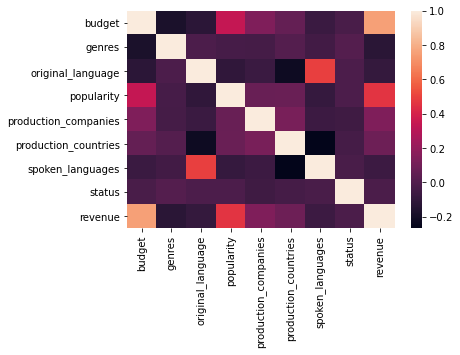

In [12]:
sns.heatmap(training_data.corr())

In [13]:
y = training_data['revenue']
x = training_data.drop(['revenue'], axis=1)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [15]:
testing_data = test_data.drop(['id', 'belongs_to_collection', 'homepage', 'imdb_id',
                                 'original_title', 'overview', 'poster_path', 'release_date', 'tagline', 'title',
                              'Keywords', 'cast', 'crew'
                             ], axis = 1)
testing_data = testing_data.fillna('0')
testing_data.index = test_data['id']
testing_data['genres'] = process_json_data(testing_data['genres'])
testing_data['production_companies'] = process_json_data(testing_data['production_companies'])
testing_data['production_countries'] = process_json_data(testing_data['production_countries'])
testing_data['spoken_languages'] = process_json_data(testing_data['spoken_languages'])
testing_data['original_language'] = LabelEncoder().fit_transform(testing_data['original_language'])
testing_data['status'] = LabelEncoder().fit_transform(testing_data['status'])

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

validations = model.predict(x_val)

print(np.sqrt(mean_squared_error(validations, y_val)))

76754060.02136204


In [18]:
results = model.predict(testing_data)


submission = pd.DataFrame({'id' : test_data['id'], 'revenue': results})
submission.to_csv('submission.csv', index=False)

# 3.48308